In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
df = pd.read_csv("Ticker_Large-Mid_Cap_Stock_values.csv")
print(df.head())

      Date  Nifty Close  Nifty Volume  Daily Return (%NIFTY)  BHEL Close  \
0  2/14/22  16842.80078       30550000                  3.03   52.557354   
1  2/15/22  17352.44922       29870000                 -0.17   54.188953   
2  2/16/22  17322.19922       24450000                 -0.10   54.485607   
3  2/17/22  17304.59961       23210000                 -0.16   53.645088   
4  2/18/22  17276.30078       18960000                 -0.40   52.804565   

   BHEL Volume Daily Return (%BHEL)  BEL Close  BEL Volume Daily Return (%BEL)  
0     26510266                 3.10  62.383583    31961610                1.56  
1     20300727                 0.55  63.354843    10746255                0.03  
2     17655412                -1.54  63.370766    13420629                1.01  
3     45900731                -1.57  64.007652    19166469               -0.50  
4     17873081                -5.43  63.689209    10616886               -0.92  


In [3]:
df['Date'] = pd.to_datetime(df['Date'], format='%m/%d/%y')
df = df.sort_values('Date')

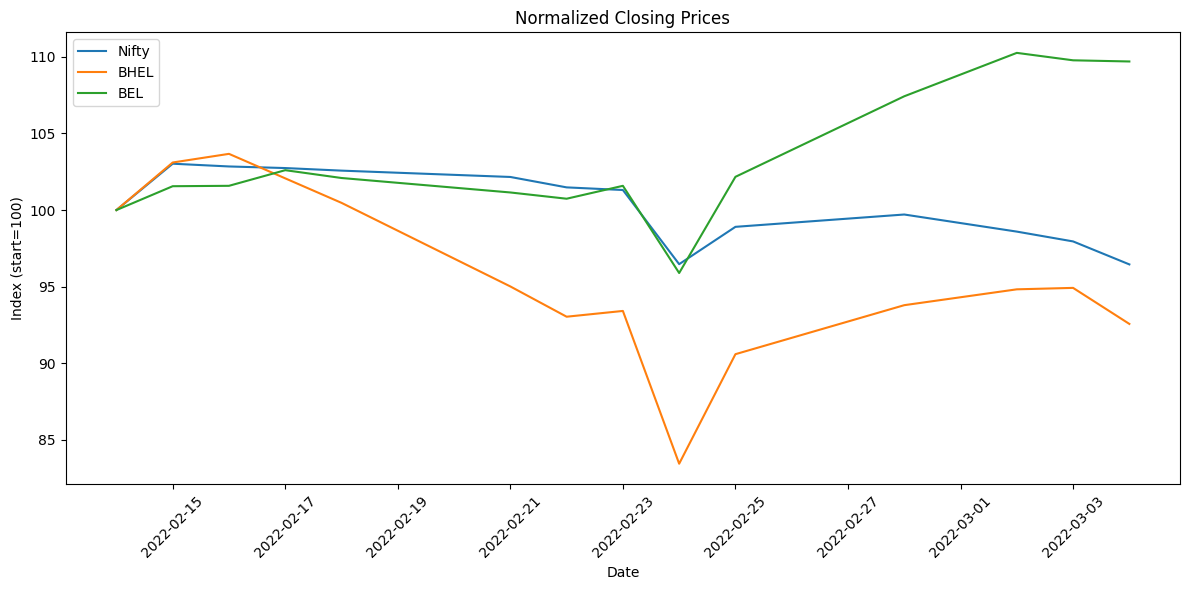

In [7]:
df['Nifty_norm'] = df['Nifty Close'] / df['Nifty Close'].iloc[0] * 100
df['BHEL_norm'] = df['BHEL Close'] / df['BHEL Close'].iloc[0] * 100
df['BEL_norm'] = df['BEL Close'] / df['BEL Close'].iloc[0] * 100

import seaborn as sns

fig, ax1 = plt.subplots(figsize=(12,6))
sns.lineplot(x='Date', y='Nifty_norm', data=df, label='Nifty')
sns.lineplot(x='Date', y='BHEL_norm', data=df, label='BHEL')
sns.lineplot(x='Date', y='BEL_norm', data=df, label='BEL')
plt.title('Normalized Closing Prices')
plt.xticks(rotation=45)
plt.ylabel('Index (start=100)')
plt.legend()
plt.tight_layout()
plt.show()
fig.savefig('Normalized Closing Prices', dpi=300)

In [78]:

fig.savefig('Normalized Closing Prices.png', dpi=300)

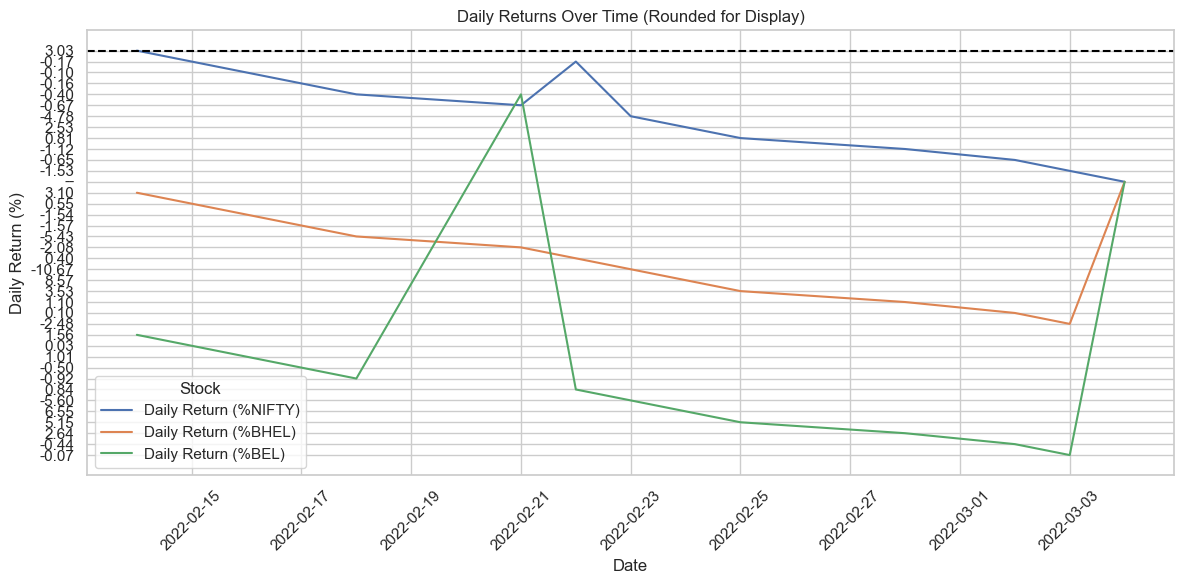

In [51]:
df_melted = df.melt(
    id_vars='Date',
    value_vars=['Daily Return (%NIFTY)', 'Daily Return (%BHEL)', 'Daily Return (%BEL)'],
    var_name='Stock',
    value_name='Daily_Return'
)
df_melted['Daily_Return_Rounded'] = df_melted['Daily_Return'].round(1)

plt.figure(figsize=(12,6))
sns.lineplot(data=df_melted, x='Date', y='Daily_Return_Rounded', hue='Stock')

plt.axhline(0, color='black', linestyle='--')
plt.title('Daily Returns Over Time (Rounded for Display)')
plt.xlabel('Date')
plt.ylabel('Daily Return (%)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

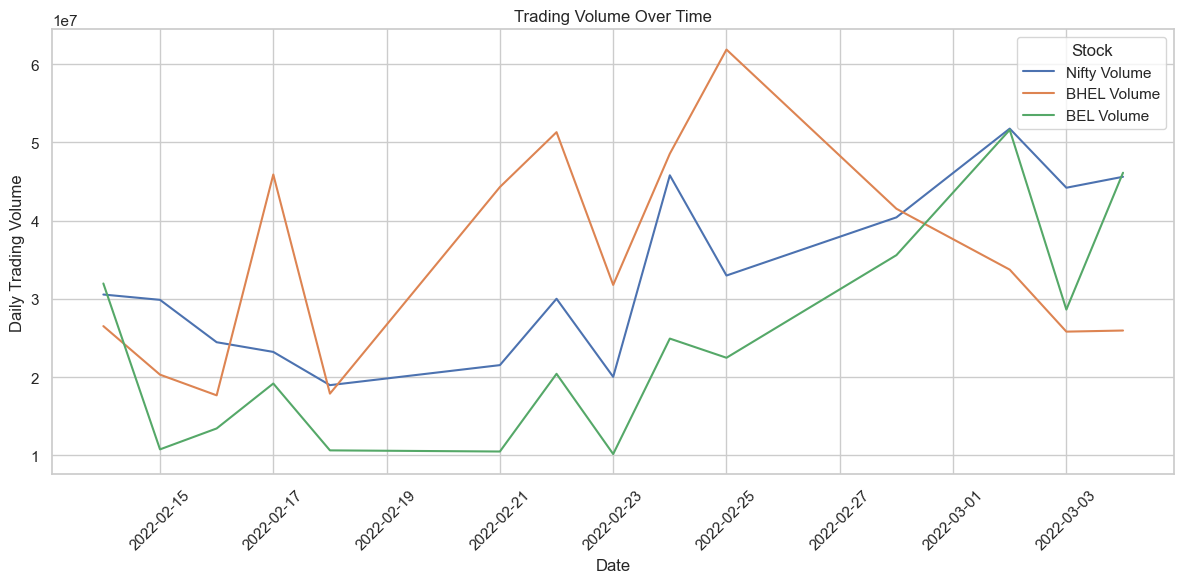

In [ ]:
df_vol_melted = df.melt(
    id_vars='Date',
    value_vars=['Nifty Volume ', 'BHEL Volume', 'BEL Volume'],
    var_name='Stock',
    value_name='Volume'
)

plt.figure(figsize=(12,6))
sns.lineplot(data=df_vol_melted, x='Date', y='Volume', hue='Stock')

plt.title('Trading Volume Over Time')
plt.xlabel('Date')
plt.ylabel('Daily Trading Volume')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


In [77]:
fig.savefig('Trading Volume Over Time.png', dpi=300)

In [68]:
print(df.columns.tolist())
print(gt.columns.tolist())

['Date', 'Nifty Close', 'Nifty Volume\xa0', 'Daily Return (%NIFTY)', 'BHEL Close', 'BHEL Volume', 'Daily Return (%BHEL)', 'BEL Close', 'BEL Volume', 'Daily Return (%BEL)', 'Nifty_norm', 'BHEL_norm', 'BEL_norm', 'Market crash today: (India)', 'Nifty crash: (India)']
['Date', 'Market crash today: (India)', 'Nifty crash: (India)']


In [70]:
gt = pd.read_csv('google_trends.csv')
gt['Date'] = pd.to_datetime(gt['Date'])
gt = gt.sort_values('Date')

df = pd.merge(df, gt, on='Date', how='left')

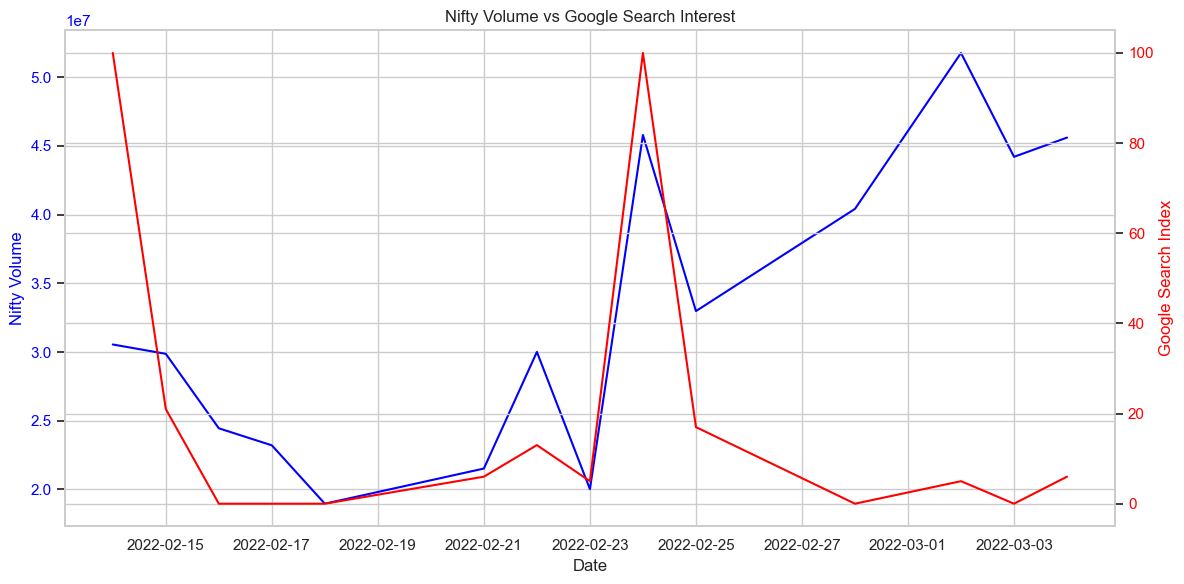

In [71]:

fig, ax1 = plt.subplots(figsize=(12,6))

ax1.plot(df['Date'], df['Nifty Volume '], color='blue', label='Nifty Volume')
ax1.set_xlabel('Date')
ax1.set_ylabel('Nifty Volume', color='blue')
ax1.tick_params(axis='y', labelcolor='blue')

ax2 = ax1.twinx()
ax2.plot(df['Date'], df['Market crash today: (India)'], color='red', label='Google Trends (Market crash today)')
ax2.set_ylabel('Google Search Index', color='red')
ax2.tick_params(axis='y', labelcolor='red')

plt.title('Nifty Volume vs Google Search Interest')
plt.xticks(rotation=45)
fig.tight_layout()
plt.show()

In [72]:
print(df['Date'].head(10))
print(gt['Date'].head(10))

0   2022-02-14
1   2022-02-15
2   2022-02-16
3   2022-02-17
4   2022-02-18
5   2022-02-21
6   2022-02-22
7   2022-02-23
8   2022-02-24
9   2022-02-25
Name: Date, dtype: datetime64[ns]
0   2022-02-08
1   2022-02-09
2   2022-02-10
3   2022-02-11
4   2022-02-12
5   2022-02-13
6   2022-02-14
7   2022-02-15
8   2022-02-16
9   2022-02-17
Name: Date, dtype: datetime64[ns]


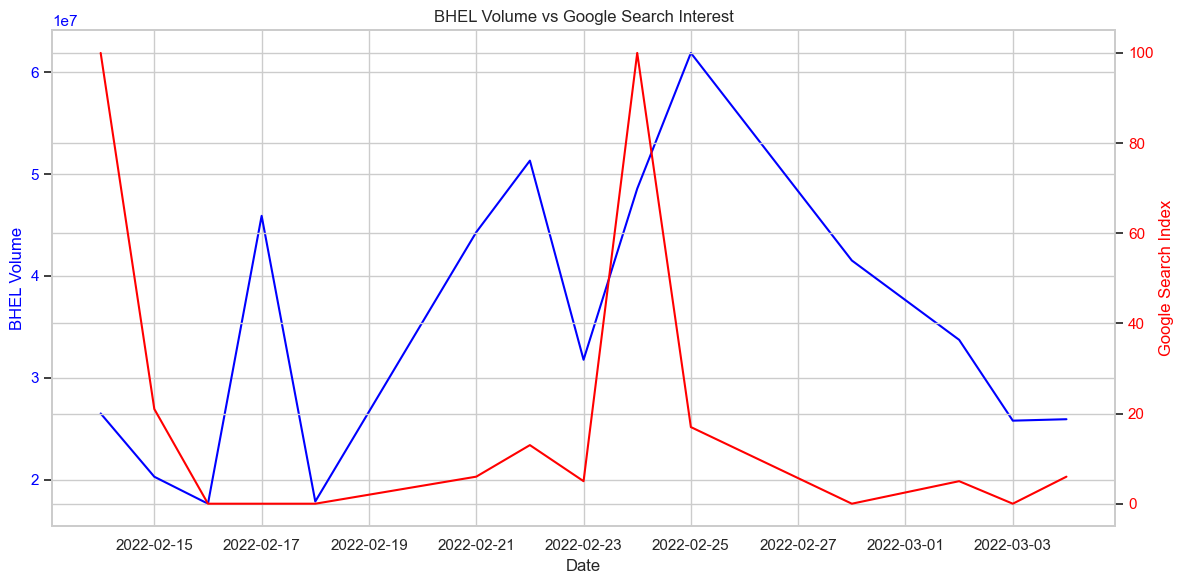

In [82]:

fig, ax1 = plt.subplots(figsize=(12,6))

ax1.plot(df['Date'], df['BHEL Volume'], color='blue', label='BHEL Volume')
ax1.set_xlabel('Date')
ax1.set_ylabel('BHEL Volume', color='blue')
ax1.tick_params(axis='y', labelcolor='blue')

ax2 = ax1.twinx()
ax2.plot(df['Date'], df['Market crash today: (India)'], color='red', label='Google Trends (Market crash today)')
ax2.set_ylabel('Google Search Index', color='red')
ax2.tick_params(axis='y', labelcolor='red')

plt.title('BHEL Volume vs Google Search Interest')
plt.xticks(rotation=45)
fig.tight_layout()
plt.show()

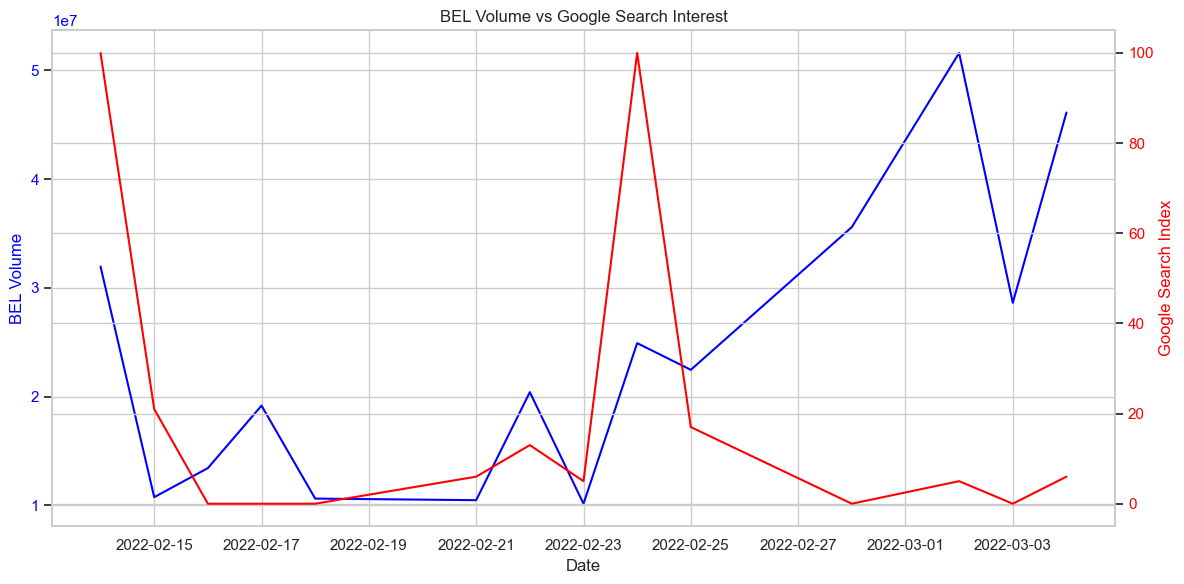

In [83]:

fig, ax1 = plt.subplots(figsize=(12,6))

ax1.plot(df['Date'], df['BEL Volume'], color='blue', label='BHEL Volume')
ax1.set_xlabel('Date')
ax1.set_ylabel('BEL Volume', color='blue')
ax1.tick_params(axis='y', labelcolor='blue')

ax2 = ax1.twinx()
ax2.plot(df['Date'], df['Market crash today: (India)'], color='red', label='Google Trends (Market crash today)')
ax2.set_ylabel('Google Search Index', color='red')
ax2.tick_params(axis='y', labelcolor='red')

plt.title('BEL Volume vs Google Search Interest')
plt.xticks(rotation=45)
fig.tight_layout()
plt.show()

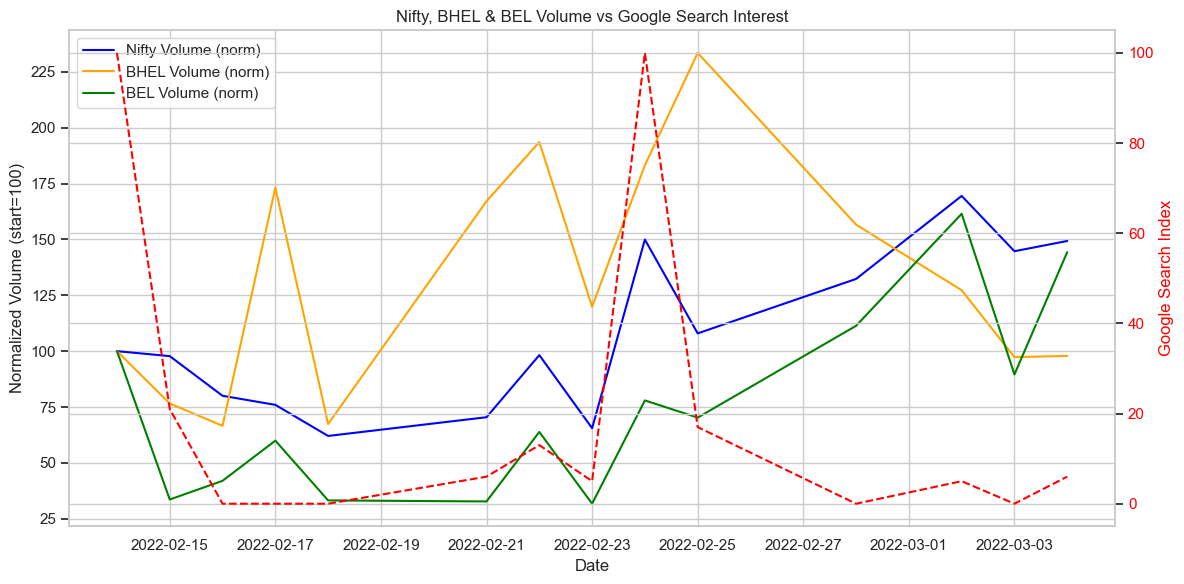

In [87]:
df['Nifty_Volume_Norm'] = df['Nifty Volume '] / df['Nifty Volume '].iloc[0] * 100
df['BHEL_Volume_Norm'] = df['BHEL Volume'] / df['BHEL Volume'].iloc[0] * 100
df['BEL_Volume_Norm'] = df['BEL Volume'] / df['BEL Volume'].iloc[0] * 100


fig, ax1 = plt.subplots(figsize=(12,6))

ax1.plot(df['Date'], df['Nifty_Volume_Norm'], color='blue', label='Nifty Volume (norm)')
ax1.plot(df['Date'], df['BHEL_Volume_Norm'], color='orange', label='BHEL Volume (norm)')
ax1.plot(df['Date'], df['BEL_Volume_Norm'], color='green', label='BEL Volume (norm)')

ax1.set_xlabel('Date')
ax1.set_ylabel('Normalized Volume (start=100)')
ax1.tick_params(axis='y')
ax1.legend(loc='upper left')

ax2 = ax1.twinx()
ax2.plot(df['Date'], df['Market crash today: (India)'], color='red', linestyle='--', label='Google Trends')
ax2.set_ylabel('Google Search Index', color='red')
ax2.tick_params(axis='y', labelcolor='red')

plt.title('Nifty, BHEL & BEL Volume vs Google Search Interest')
plt.xticks(rotation=45)
fig.tight_layout()
plt.show()

fig.savefig('combined_volume_vs_google_trends.png', dpi=300)